#A classical ML, unsupervised clustering example using sklearn on the Iris dataset.

##General process for clustering used in this notebook.
1. Load Dataset.
2. Define the type of model used.
3. Fit the model to the dataset.
4. Use the fitted model to predict the class label for the data.
5. Model selection using criterion such as `silhouette_score` or `rand_score`.

#See the sections below for implementations, experiments & analysis for individual algorithms.

In [ ]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.cluster import KMeans

#Load Iris data.

In [ ]:
from sklearn.model_selection import train_test_split

#load the iris dataset
dataset = load_iris()

ds = pd.DataFrame(data = dataset.data, columns= dataset.feature_names)
features = pd.DataFrame(data = dataset.data, columns= dataset.feature_names)
true_labels = dataset.target

X_train, X_test, y_train, y_test = train_test_split(features, true_labels, test_size = 0.2)

In [ ]:
"""
#load the iris dataset
dataset = load_iris()
ds = pd.DataFrame(data = dataset.data, columns= dataset.feature_names)
true_labels = dataset.target

ds.head()
"""

'\n#load the iris dataset\ndataset = load_iris()\nds = pd.DataFrame(data = dataset.data, columns= dataset.feature_names)\ntrue_labels = dataset.target\n\nds.head()\n'

##Display true labels.

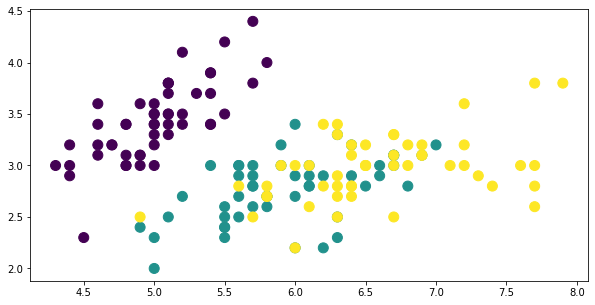

In [ ]:
# True labels
plt.figure(figsize=(10,5))
plt.scatter(ds['sepal length (cm)'],ds['sepal width (cm)'], c = true_labels, s=100, cmap='viridis')

#K-means clustering.

1. A number of clusters are used as inputs to the Kmeans algorithms. According to the `silhouette_score` below, the highest reading is `0.7994` where `n_cluster = 3`.

In [ ]:
from sklearn.metrics import silhouette_score

inertia = np.empty(10)
start=2   # min n_clusters for KMeans
best_model = None
for n_cluster in range(start, 11):
    model = KMeans(n_clusters=n_cluster)
    
    #model.fit(ds)
    model.fit(X_train)
    
    inertia[n_cluster-start] = model.inertia_
    
    #label = model.predict(ds)
    label = model.predict(X_test)
    #print(y_test.reshape(-1,1))
    #print(label)

    #sil_coeff = silhouette_score(ds, label, metric='euclidean')
    sil_coeff = silhouette_score(y_test.reshape(-1,1), label, metric='euclidean')
    
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.7045454545454547
For n_clusters=3, The Silhouette Coefficient is 0.7994159544159545
For n_clusters=4, The Silhouette Coefficient is 0.3333333333333333
For n_clusters=5, The Silhouette Coefficient is 0.16666666666666666
For n_clusters=6, The Silhouette Coefficient is -0.06666666666666667
For n_clusters=7, The Silhouette Coefficient is 0.0
For n_clusters=8, The Silhouette Coefficient is 0.0
For n_clusters=9, The Silhouette Coefficient is 0.0
For n_clusters=10, The Silhouette Coefficient is 0.0


##Using inertia as scoring criterion for model selection.

1. There is a steep drop in inertia between number of clusters from 2 to 3. Therefore, a good indication of a good model will be when `n_cluster=3`.
2. Only tried `inertia` on Kmeans as other models in this notebook do not have the `inertia` property.

In [ ]:
def inertia_diff(inertia_store):
    """
    Get differences between current & previous inertia values in inertia_store.
    """
    diff=[]
    for i, inertia in enumerate(inertia_store):
        if i+1 < len(inertia_store):
            diff.append(inertia - inertia_store[i+1])

    return diff

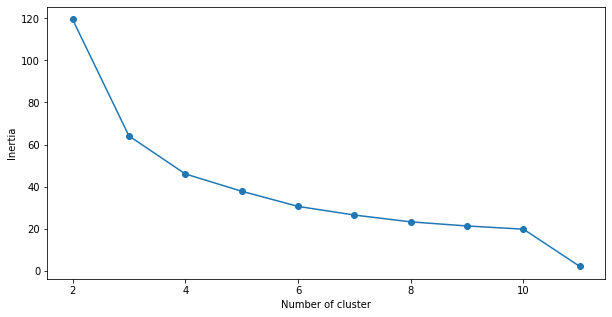

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(start,10+start), inertia, '-o')
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

## Using `rand_score` as a scoring criterion for Kmeans when the true labels for the dataset are known.

1. A high `rand_score` of `0.8797` also indicates a good fit when when the number of cluster is 3.

KMeans(n_clusters=3)
Results based on rand_score 0.8797315436241611 with n = 3


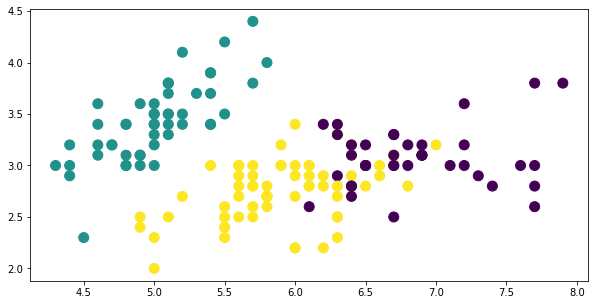

In [ ]:
n_clusters = np.argmax(inertia_diff(inertia)) + start + 1

model = KMeans(n_clusters=n_clusters)
model.fit(ds)
print(model)
y_pred = model.predict(ds)
r_score = metrics.rand_score(true_labels, y_pred)
print("Results based on rand_score {} with n = {}".format(r_score, n_clusters))

#Plot the prediction result
plt.figure(figsize=(10,5))
plt.scatter(ds['sepal length (cm)'],ds['sepal width (cm)'], c = y_pred, s=100, cmap='viridis')

#Helper functions.

In [ ]:
def get_best():
    best = {'model': [], 
        'labels_pred': [], 
        'n_cluster': [], 
        'silhouette_score': [], 
        'calinski_harabasz_score': [],
        'davies_bouldin_score': [],
        'rand_score': [],
        'bic': [],}

    return best

In [ ]:
def store_best(best, model, labels_pred, n_cluster, 
               sil_coeff, ch_score, db_score, r_score,
               bic,):  
    best['model'].append(model)
    best['labels_pred'].append(labels_pred)
    best['n_cluster'].append(n_cluster)
    best['silhouette_score'].append(sil_coeff)
    best['calinski_harabasz_score'].append(ch_score)
    best['davies_bouldin_score'].append(db_score)
    best['rand_score'].append(r_score)
    best['bic'].append(bic)

    return best

In [ ]:
def print_best(best):
    silhouette_score_i = np.argmax(best['silhouette_score'])
    calinski_harabasz_score_i = np.argmax(best['calinski_harabasz_score'])
    davies_bouldin_score_i = np.argmin(best['davies_bouldin_score'])      # Lower the better.
    rand_score_i = np.argmax(best['rand_score'])    
    bic_i = np.argmin(best['bic'])          # Lower the better.

    print('silhouette_score shows n = {} (Comparison with data)'.format(best['n_cluster'][silhouette_score_i]))
    print('calinski_harabasz_score shows n = {} Comparison with data)'.format(best['n_cluster'][calinski_harabasz_score_i]))
    print('davies_bouldin_score shows n = {} Comparison with data)'.format(best['n_cluster'][davies_bouldin_score_i]))
    print('rand_score shows n = {} (Comparison with true labels)'.format(best['n_cluster'][rand_score_i]))
    print('bic_i shows n = {} (ONLY applicable for GMM)'.format(best['n_cluster'][bic_i]))

    return rand_score_i

In [ ]:
def compute_scores(true_labels, ds, labels_pred):    
    sil_coeff = silhouette_score(ds, labels_pred, metric='euclidean')
    ch_score = metrics.calinski_harabasz_score(ds, labels_pred)    
    db_score = metrics.davies_bouldin_score(ds, labels_pred)      # Lower the better
    # Uses rand_score for model selection (best k value) based on known target labels.
    r_score = metrics.rand_score(true_labels, labels_pred)

    return sil_coeff, ch_score, db_score, r_score

#Other clustering algorithms experimented in this notebook along with the following evaluation criterion [2]:

1. `silhouette_score` (Used when true labels are unknown)
2. `calinski_harabasz_score` (Used when true labels are unknown)
3. `davies_bouldin_score` (Used when true labels are unknown)
4. `bic` (ONLY applicable for GMM)
5. `rand_score` (Comparison with true labels when ground truths are known)

## SpectralClustering
1. Gives good results when number of clusters are small [1].
2. Both the `calinski_harabasz_score` & `rand_score` gives the optimal score when `n_cluster = 3`.

silhouette_score shows n = 2 (Comparison with data)
calinski_harabasz_score shows n = 3 Comparison with data)
davies_bouldin_score shows n = 2 Comparison with data)
rand_score shows n = 3 (Comparison with true labels)
bic_i shows n = 2 (ONLY applicable for GMM)
Results based on rand_score 0.8859060402684564 with n = 3


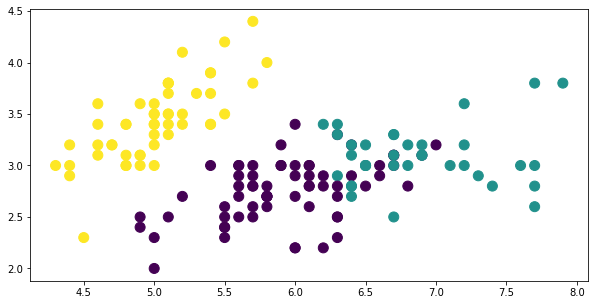

In [ ]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, OPTICS, SpectralClustering

best = get_best()

for n_cluster in range(2, 11):
    model = SpectralClustering(n_clusters=n_cluster)
    model.fit(ds)
    labels_pred = model.labels_

    sil_coeff, ch_score, db_score, r_score = compute_scores(true_labels, 
                                                            ds, 
                                                            labels_pred)

    best = store_best(
        best, 
        model, 
        labels_pred,
        n_cluster, 
        sil_coeff, 
        ch_score,
        db_score,
        r_score,
        0,
    )

rand_score_i = print_best(best)

print("Results based on rand_score {} with n = {}".format(best['rand_score'][rand_score_i], best['n_cluster'][rand_score_i]))
plt.figure(figsize=(10,5))
plt.scatter(ds['sepal length (cm)'],ds['sepal width (cm)'], c = best['labels_pred'][rand_score_i], s=100, cmap='viridis')

##Agglomerative

1. Both the `calinski_harabasz_score` & `rand_score` gives the optimal score when `n_cluster = 3`.

silhouette_score shows n = 2 (Comparison with data)
calinski_harabasz_score shows n = 3 Comparison with data)
davies_bouldin_score shows n = 2 Comparison with data)
rand_score shows n = 3 (Comparison with true labels)
bic_i shows n = 2 (ONLY applicable for GMM)
Results based on rand_score 0.8797315436241611 with n = 3


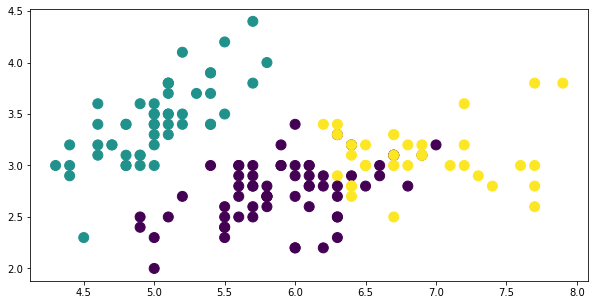

In [ ]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, OPTICS, SpectralClustering

best = get_best()

for n_cluster in range(2, 11):
    model = AgglomerativeClustering(n_clusters=n_cluster)
    model.fit(ds)
    labels_pred = model.labels_

    sil_coeff, ch_score, db_score, r_score = compute_scores(true_labels, 
                                                            ds, 
                                                            labels_pred)

    best = store_best(
        best, 
        model, 
        labels_pred,
        n_cluster, 
        sil_coeff, 
        ch_score,
        db_score,
        r_score,
        0,
    )

rand_score_i = print_best(best)

print("Results based on rand_score {} with n = {}".format(best['rand_score'][rand_score_i], best['n_cluster'][rand_score_i]))
plt.figure(figsize=(10,5))
plt.scatter(ds['sepal length (cm)'],ds['sepal width (cm)'], c = best['labels_pred'][rand_score_i], s=100, cmap='viridis')

##OPTICS
1. Don't need to specify `n_cluster` but need to specify `min_samples` (number of samples in a neighborhood for a point to be considered as a core point [3]).
2. The `n` in the output below indicates `min_samples` & not number of clusters.
2. Predicted `38` unique labels.
4. Gets a relatively low `rand_score` of `0.6567` (compare to other algorithms) when `min_samples = 2`.

NOTE: For OPTICS, n is referring to min_samples instead of n_cluster.



/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_optics.py:803: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


silhouette_score shows n = 2 (Comparison with data)
calinski_harabasz_score shows n = 6 Comparison with data)
davies_bouldin_score shows n = 2 Comparison with data)
rand_score shows n = 2 (Comparison with true labels)
bic_i shows n = 2 (ONLY applicable for GMM)

labels_pred: [ 0  4  5  5 -1 -1 -1  1  6  4  2 -1  4 -1 -1 -1 -1  0 -1  7  8  7 -1  3
 -1 -1  3 -1 -1 -1 -1  8 -1 -1  4 -1 -1 -1  6  1 -1 -1  6 -1 -1  4  7  5
  2 -1 19 18 19 11 17 14 18  9 17 -1  9 -1 -1 15 -1 17 14 12 34 10 29 -1
 31 15 16 17 -1 -1 15 -1 10 10 12 31 14 -1 19 34 13 11 -1 15 12  9 13 13
 13 16  9 13 -1 30 -1 21 22 35 -1 33 -1 -1 20 -1 24 30 -1 27 21 36 35 -1
 26 30 35 28 -1 32 28 29 22 32 33 36 22 31 -1 -1 27 21 29 24 25 23 30 26
 25 23 28 20 27 -1]

Number of unique labels predicted: 38
Results based on rand_score 0.6567337807606264 with min_samples = 2


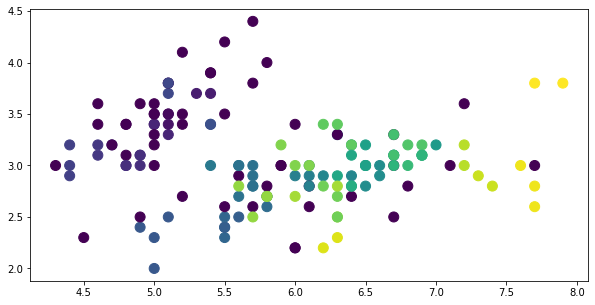

In [ ]:
print("NOTE: For OPTICS, n is referring to min_samples instead of n_cluster.\n")
best = get_best()

for n_cluster in range(2, 11):
    model = OPTICS(min_samples=n_cluster)
    model.fit(ds)
    labels_pred = model.labels_

    sil_coeff, ch_score, db_score, r_score = compute_scores(true_labels, 
                                                            ds, 
                                                            labels_pred)

    best = store_best(
        best, 
        model, 
        labels_pred,
        n_cluster, 
        sil_coeff, 
        ch_score,
        db_score,
        r_score,
        0,
    )

rand_score_i = print_best(best)
best_pred = best['labels_pred'][rand_score_i]
print('\nlabels_pred: {}\n'.format(best_pred))

from collections import Counter
print("Number of unique labels predicted: {}".format(len(Counter(best_pred).values())))

print("Results based on rand_score {} with min_samples = {}".format(best['rand_score'][rand_score_i], best['n_cluster'][rand_score_i]))
plt.figure(figsize=(10,5))
plt.scatter(ds['sepal length (cm)'],ds['sepal width (cm)'], c = best['labels_pred'][rand_score_i], s=100, cmap='viridis')
#plt.scatter(ds['sepal length (cm)'],ds['sepal width (cm)'], c = best['labels_pred'][rand_score_i], s=100, cmap='Spectral')

##GMM

1. Tried spliting the data into train, test set. Trained using the train set & called predict using the unseen test set.
2. Gets the optimal `rand_score` when `n_cluster = 4` while only the `calinski_harabasz_score` gives the optimal score when `n_cluster = 3`.

silhouette_score shows n = 2 (Comparison with data)
calinski_harabasz_score shows n = 3 Comparison with data)
davies_bouldin_score shows n = 2 Comparison with data)
rand_score shows n = 4 (Comparison with true labels)
bic_i shows n = 2 (ONLY applicable for GMM)
Results based on rand_score 0.9310344827586207 with n = 4


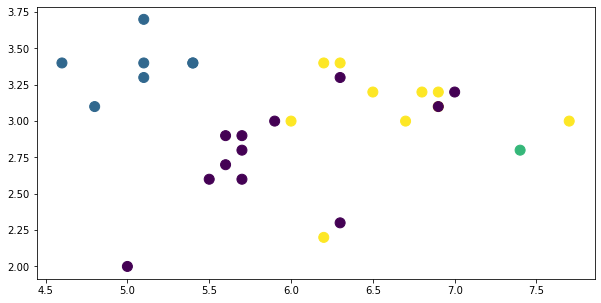

In [ ]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

best = get_best()

for n_cluster in range(2, 11):
    model = GaussianMixture(n_components=n_cluster)
    model.fit(X_train)
    bic = model.bic(X_train)      # Lower the better
    labels_pred = model.predict(X_test)

    sil_coeff, ch_score, db_score, r_score = compute_scores(y_test, 
                                                            X_test, 
                                                            labels_pred)

    best = store_best(
        best, 
        model, 
        labels_pred,
        n_cluster, 
        sil_coeff, 
        ch_score,
        db_score,
        r_score,
        bic,
    )

rand_score_i = print_best(best)

print("Results based on rand_score {} with n = {}".format(best['rand_score'][rand_score_i], best['n_cluster'][rand_score_i]))
plt.figure(figsize=(10,5))
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c = best['labels_pred'][rand_score_i], s=100, cmap='viridis')

##BGM

1. Tried spliting the data into train, test set. Trained using the train set & called predict using the unseen test set.
2. Gets the optimal `rand_score` & `calinski_harabasz_score` when `n_cluster = 3`.

silhouette_score shows n = 2 (Comparison with data)
calinski_harabasz_score shows n = 3 Comparison with data)
davies_bouldin_score shows n = 2 Comparison with data)
rand_score shows n = 3 (Comparison with true labels)
bic_i shows n = 2 (ONLY applicable for GMM)
Results based on rand_score 0.9494252873563218 with n = 3


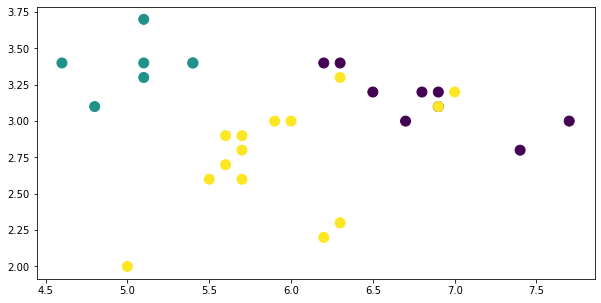

In [ ]:
best = get_best()

for n_cluster in range(2, 11):
    model = BayesianGaussianMixture(n_components=n_cluster)
    model.fit(X_train)
    labels_pred = model.predict(X_test)

    sil_coeff, ch_score, db_score, r_score = compute_scores(y_test, 
                                                            X_test, 
                                                            labels_pred)

    best = store_best(
        best, 
        model, 
        labels_pred,
        n_cluster, 
        sil_coeff, 
        ch_score,
        db_score,
        r_score,
        0,
    )

rand_score_i = print_best(best)

print("Results based on rand_score {} with n = {}".format(best['rand_score'][rand_score_i], best['n_cluster'][rand_score_i]))
plt.figure(figsize=(10,5))
plt.scatter(X_test['sepal length (cm)'],X_test['sepal width (cm)'], c = best['labels_pred'][rand_score_i], s=100, cmap='viridis')

#Conclusions

1. Almost all algorithms experimented in this notebook are able to produce satisfatory results (when used in conjuntion with the approproate evalution method) with the exception of `OPTICS` (which predicted 38 labels).

2. Assuming ground truths are unknown, the `calinski_harabasz_score` gives optimal results (when  `n_cluster = 3`) over the other scoring criterion used in this notebook.

3. `rand_score` is able to give optimum results (when  `n_cluster = 3`) when ground truths are known.

#References

1. [Overview of clustering methods](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods)
2. [Clustering performance evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)
3. [sklearn.cluster.OPTICS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html#sklearn.cluster.OPTICS)